In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

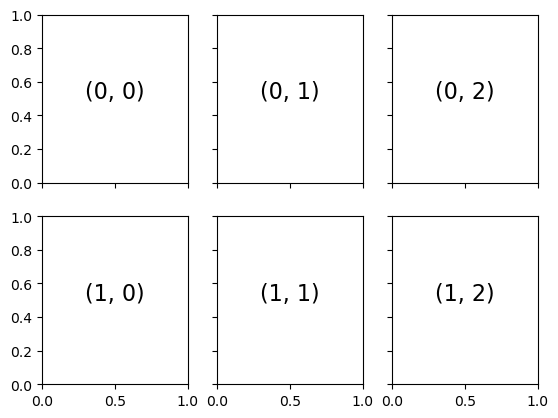

In [6]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)), fontsize=16, ha='center')
plt.show()

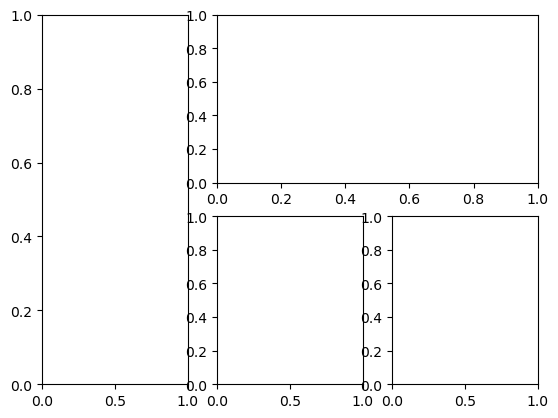

In [10]:
grid = plt.GridSpec(2, 3)
plt.subplot(grid[:2, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, 1])
plt.subplot(grid[1, 2])
plt.show()

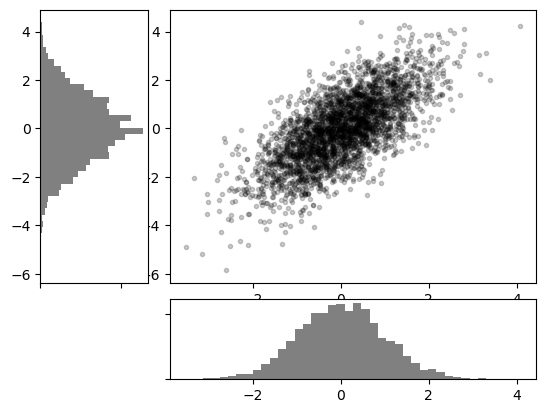

In [27]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
rng = np.random.default_rng(1)
x, y = rng.multivariate_normal(mean, cov, 3000).T
fig = plt.figure()
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)

main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

y_hist.hist(y, 40, orientation='horizontal', color='grey', histtype='stepfilled')
x_hist.hist(x, 40, orientation='vertical', color='grey', histtype='stepfilled')
plt.show()

In [32]:
births = pd.read_csv('./data/births-1969.csv')

In [34]:
births.index = pd.to_datetime(10000*births.year + 100*births.month + births.day, format='%Y%m%d')

In [35]:
print(births.head())


            year  month  day gender  births
1969-01-01  1969      1    1      F    4046
1969-01-01  1969      1    1      M    4440
1969-01-02  1969      1    2      F    4454
1969-01-02  1969      1    2      M    4548
1969-01-03  1969      1    3      F    4548


In [38]:
births_by_date = births.pivot_table('births',[births.index.month, births.index.day])
print(births_by_date.head())

     births
1 1  4243.0
  2  4501.0
  3  4771.0
  4  4480.0
  5  4195.0


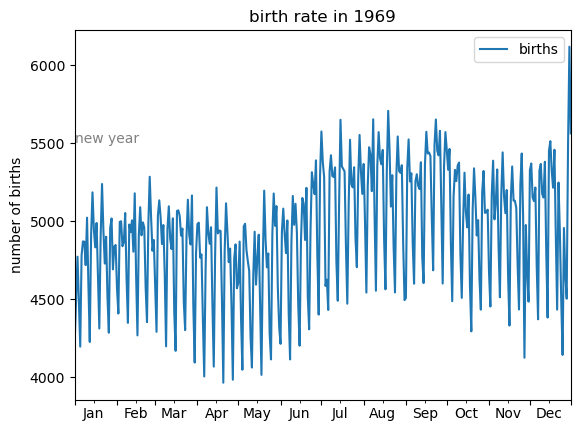

In [57]:
from datetime import datetime

births_by_date.index = [datetime(1969, date.month, date.day) for date in births_by_date.index]
fig, ax = plt.subplots()
births_by_date.plot(ax=ax) 
style = dict(size=10, color='gray')
ax.text('1969-01-01', 5500, 'new year', **style)
ax.set(title='birth rate in 1969', ylabel='number of births')
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'))
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
plt.show()


Text(0.5, 0.1, 'Data4 (0.5 0.1)')

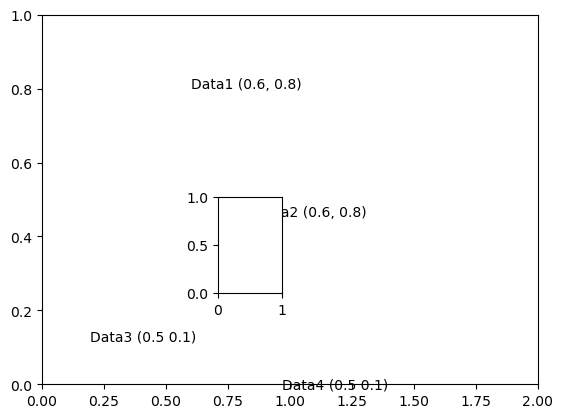

In [65]:
fig = plt.figure()
ax1 = plt.axes()
ax2 = plt.axes([0.4, 0.3, 0.1, 0.2])
ax1.set_xlim(0, 2)
ax1.text(0.6, 0.8, 'Data1 (0.6, 0.8)', transform=ax1.transData)
ax1.text(0.6, 0.8, 'Data2 (0.6, 0.8)', transform=ax2.transData)

ax1.text(0.2, 0.2, 'Data3 (0.5 0.1)', transform=fig.transFigure)
ax1.text(0.5, 0.1, 'Data4 (0.5 0.1)', transform=fig.transFigure)

Text(6, 2, 'local min')

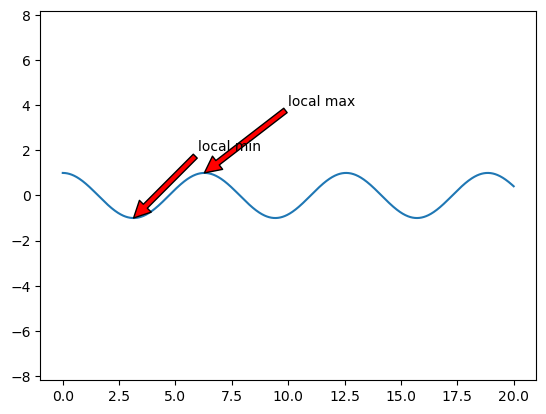

In [69]:
fig, ax = plt.subplots()
x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')
ax.annotate('local max', xy = (6.28, 1),
            xytext=(10, 4), arrowprops=dict(facecolor='red'))

ax.annotate('local min', xy = (3.14, -1),
            xytext=(6, 2), arrowprops=dict(facecolor='red'))



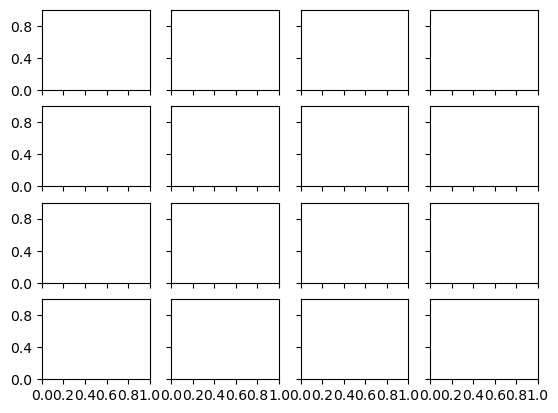

In [73]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(5))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))



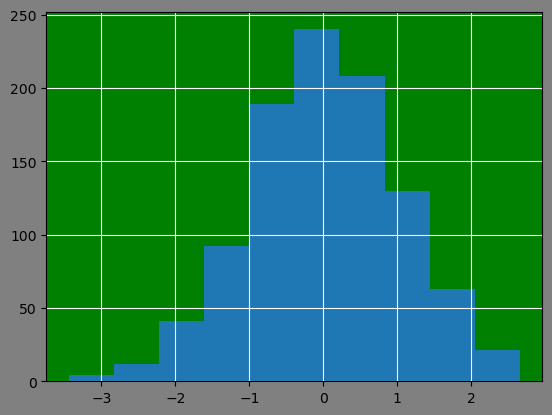

In [81]:
x= np.random.randn(1000)

fig = plt.figure(facecolor='gray')
ax = plt.axes(facecolor='green')
plt.grid(color='w', linestyle='solid')
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
plt.style.use('bmh')
plt.hist(x)
plt.show()
# .matplotlibrc